In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(12345)

In [3]:
class Perceptron(object):
        
    def __init__(self, input_size, lr=0.25):
        #--- Declare variables in class
        self.W       = np.zeros(input_size+1)  #--- one extra element for bias
        self.lr      = lr
        self.history = []
    
    #--- Activation function, note it is not differentiable
    def activation(self, x):
        if x >= 0:
            return 1
        else:
            return 0
    
    #--- Predict for a given input and current weights
    def predict(self, x):
        z = self.W.T.dot(np.insert(x,0,1)) #--- Note that we add one element for bias 
        return self.activation(z)
    
    #--- Training function
    def fit(self, X, d, epochs=20):
        
        self.history.append(self.W)
        
        cont = 0
        print(cont, self.W)
        #--- Iterate for epochs
        for _ in range(epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1) #--- Get this element and add 
                y = self.predict(X[i])
                error = d[i] - y
                self.W = self.W + self.lr * error * x #--- Update weights
                
            cont = cont+1
            print(cont, self.W)
            self.history.append(self.W)

In [4]:
X = np.array([[0,0],
              [0,1.3],
              [0.2,0.5],
              [0,1],
              [0.8,0], 
              [0.65,0.95],
              [1.1,0.35],
              [0.5,1.35],
              [1,1]], dtype=np.float32)

Y = np.array([0,0,0,0,0,1,1,1,1], dtype=np.float32)

In [5]:
perceptron = Perceptron(input_size=2)

In [6]:
perceptron.fit(X,Y)

0 [0. 0. 0.]
1 [0.         0.16249999 0.2375    ]
2 [-0.25        0.32499999  0.15000001]
3 [-0.25        0.28749998  0.3875    ]
4 [-0.25        0.44999997  0.30000001]
5 [-0.25        0.61249997  0.21250002]
6 [-0.25        0.77499996  0.12500003]
7 [-0.25        0.73749995  0.36250003]
8 [-0.5         0.69999994  0.27500004]
9 [-0.5         0.66249993  0.51250003]
10 [-0.5         0.82499993  0.42500004]
11 [-0.5         0.98749992  0.33750005]
12 [-0.75        0.78749992  0.33750005]
13 [-0.75        0.78749992  0.33750005]
14 [-0.75        0.78749992  0.33750005]
15 [-0.75        0.78749992  0.33750005]
16 [-0.75        0.78749992  0.33750005]
17 [-0.75        0.78749992  0.33750005]
18 [-0.75        0.78749992  0.33750005]
19 [-0.75        0.78749992  0.33750005]
20 [-0.75        0.78749992  0.33750005]


In [32]:
perceptron.predict([0.5,1.5])

1

## 

<ipython-input-7-cb968ef0ec99>:18: RuntimeWarning: invalid value encountered in true_divide
  ay = (-ax*perceptron.history[ep][1] - perceptron.history[ep][0])/perceptron.history[ep][2]


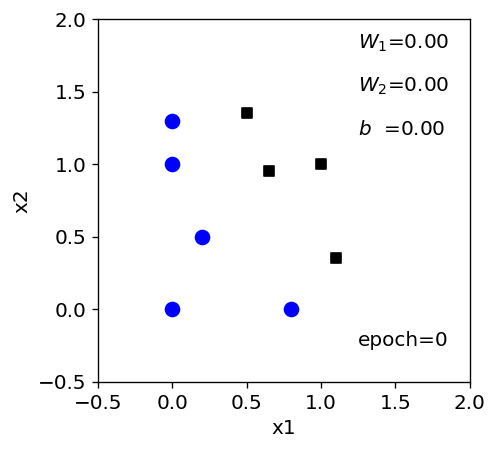

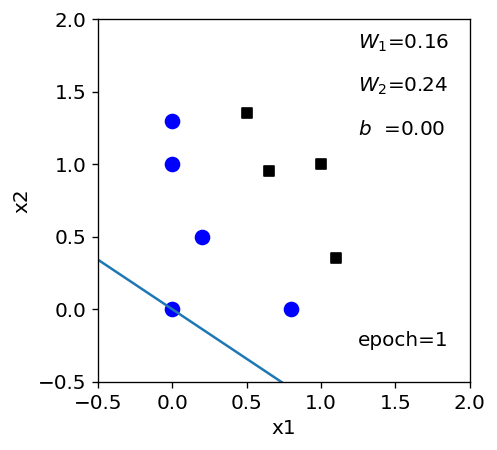

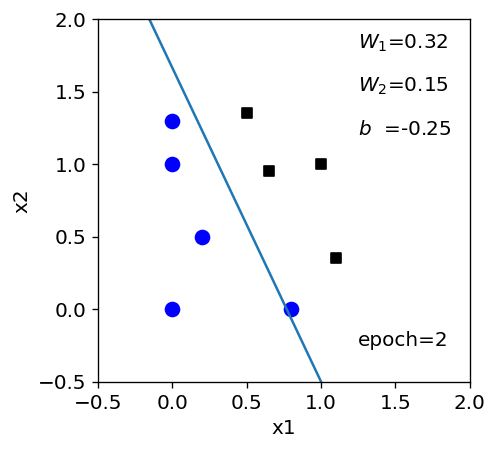

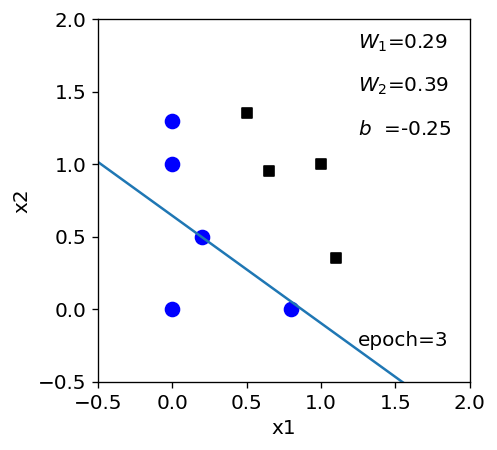

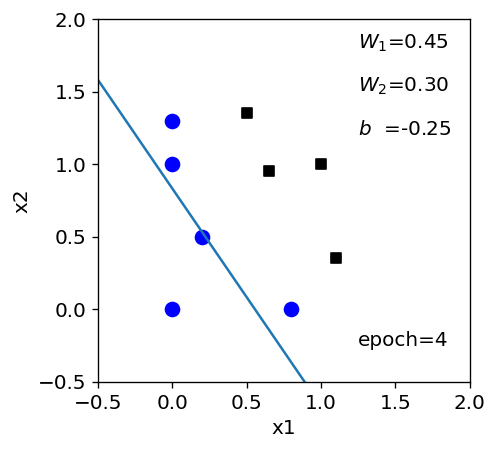

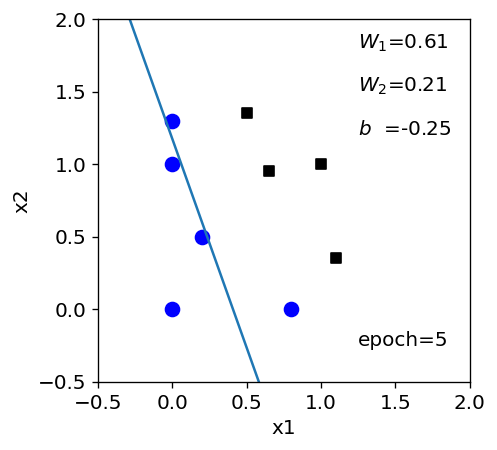

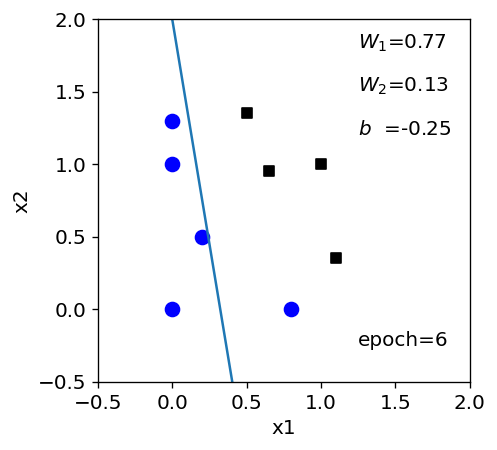

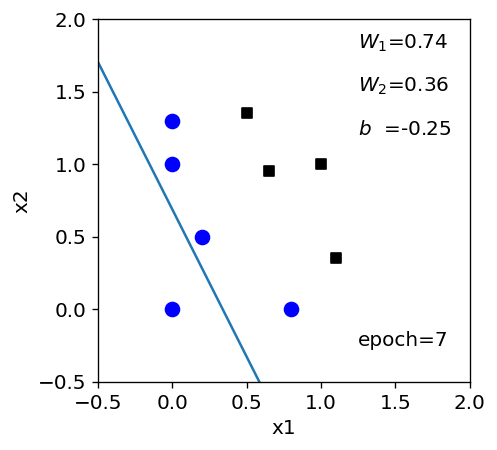

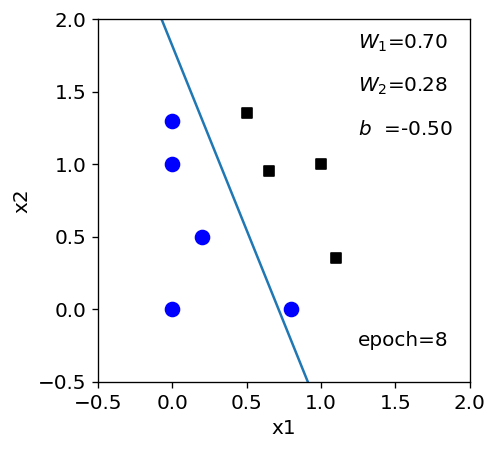

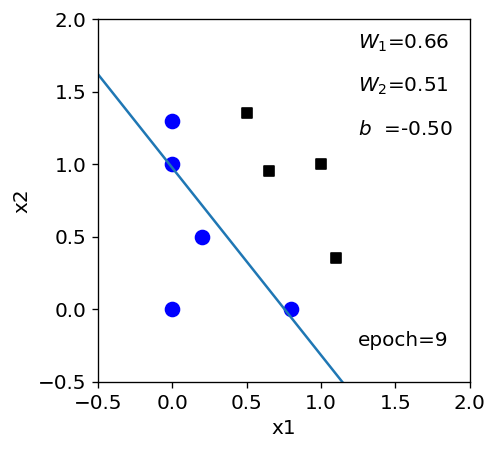

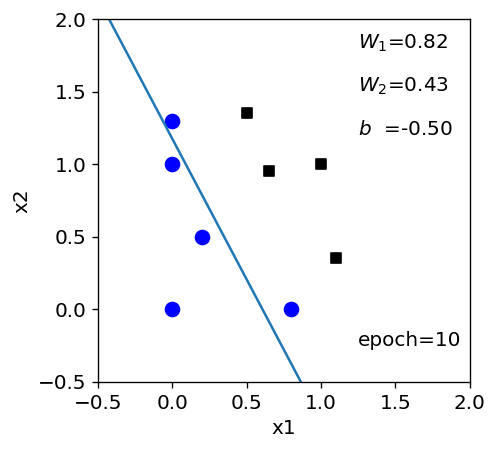

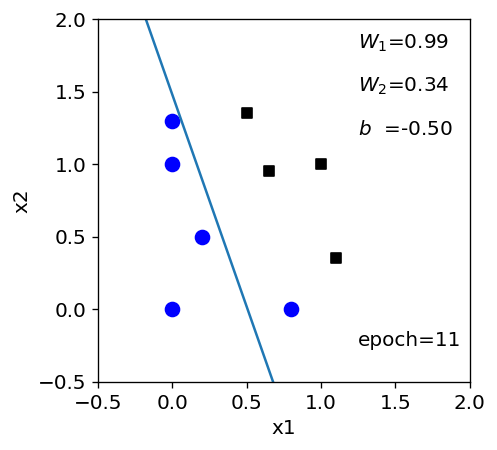

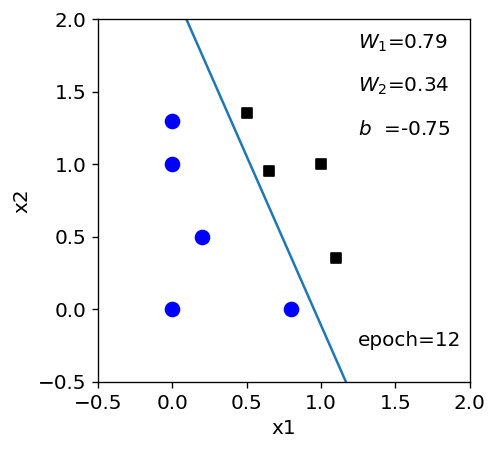

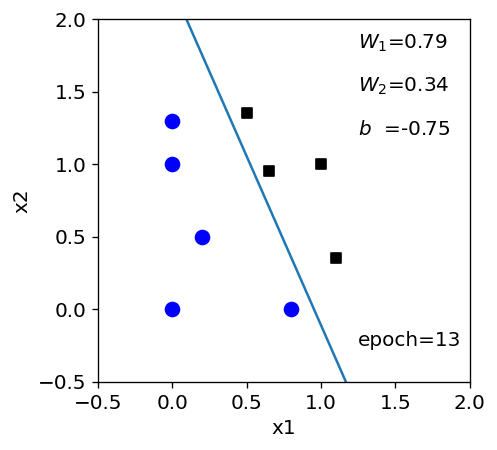

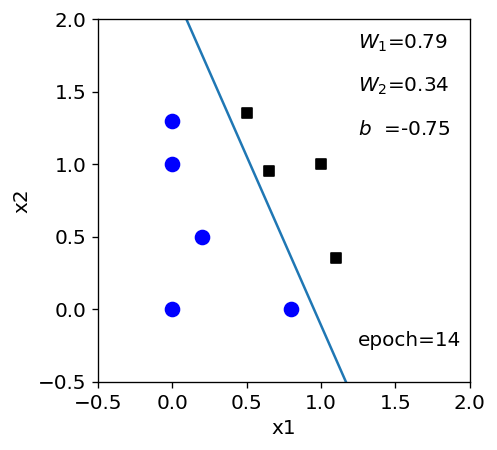

In [7]:
for ep in range(15):

    fig = plt.figure(figsize=(4,4), dpi=120)

    plt.rcParams.update({'font.size': 12})

    plt.xlim((-0.5, 2))
    plt.ylim((-0.5, 2))

    for i in range(X.shape[0]):
        if Y[i] == 0:
            plt.scatter(X[i,0],X[i,1], color='blue', s=70, marker='o')
        else:
            plt.scatter(X[i,0],X[i,1], color='black', s=30, marker='s')

    #ep = _ep
    ax = np.arange(100)/99.0*3-1
    ay = (-ax*perceptron.history[ep][1] - perceptron.history[ep][0])/perceptron.history[ep][2]
    plt.plot(ax,ay)

    plt.text(1.25,-0.25,'epoch='+str(ep))

    plt.text(1.25,1.8, '$W_1$='+'{:04.2f}'.format(perceptron.history[ep][1]))
    plt.text(1.25,1.5, '$W_2$='+'{:04.2f}'.format(perceptron.history[ep][2]))
    plt.text(1.25,1.2, '$b$  ='+'{:04.2f}'.format(perceptron.history[ep][0]))

    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()

    #fig.savefig('image_'+str(ep).zfill(2)+'.png', bbox_inches='tight')

In [8]:
from numpy import genfromtxt
data = genfromtxt('pima.csv', delimiter=',')
X_train = data[0:100,0:8]
Y_test = data[0:100,8]

X_train.shape

OSError: pima.csv not found.

In [17]:
from numpy import genfromtxt
data = genfromtxt('pima.csv', delimiter=',')
X_train = data[0:700,0:8]
Y_train = data[0:700,8]

perceptron = Perceptron(input_size=8)
perceptron.fit(X_train,Y_train, epochs = 2000)

0 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [ -7.       30.75     32.75    -91.25    -20.       11.5       2.025
   2.62675 -24.5    ]
2 [-13.25     62.5      11.25    -73.25     -7.5       8.       23.45
   4.14225  -5.75   ]
3 [-19.5     85.25     8.     -74.75   -22.       8.25    27.825    5.7995
   1.5   ]
4 [-26.5     106.75     15.      -69.5     -19.5      76.25     18.75
   8.28175  -2.75   ]
5 [-32.75   133.75    27.75   -84.5     -7.75    77.25    24.425    9.3095
 -37.    ]
6 [-39.25    162.5       8.5     -75.75    -22.       12.       26.825
  10.79925 -17.5    ]
7 [-46.      185.5      29.25    -82.75    -32.75      9.25      0.2
  11.64075 -35.5    ]
8 [-52.      202.25     18.75    -65.25    -40.        1.75     14.15
  13.71325 -36.5    ]
9 [-58.25   219.25    20.75   -83.75   -50.      17.25    13.825   14.9255
 -46.    ]
10 [ -65.25  236.5    45.25 -101.75  -46.      6.75   21.15   15.99  -52.75]
11 [-71.75  256.     26.75  -96.5   -36.25   79.     37.275  16.496 -42.5  ]
12 [

89 [-575.       435.25      10.       -68.25     -25.75      76.
   51.8      147.36625  -50.     ]
90 [-581.5    434.75    41.25  -111.     -37.75     2.5     41.05   149.722
  -83.5  ]
91 [-587.5    431.5     42.75  -118.25   -17.5     76.      46.625  152.116
  -74.75 ]
92 [-594.     438.      29.75  -107.     -50.      20.25    48.75   152.565
  -75.   ]
93 [-600.5      436.        29.5      -90.5      -23.25      79.25
   47.2      155.33275  -77.     ]
94 [-606.     446.75     7.25   -64.5    -24.25     3.25    40.575  156.97
  -43.75 ]
95 [-612.5      441.        15.75     -94.       -30.        30.5
   33.3      158.46725  -59.5    ]
96 [-619.25     440.5       27.75     -83.        -7.25       5.25
   31.725    161.00325  -71.25   ]
97 [-626.     435.75    30.25   -87.75   -19.      76.75    43.575  161.817
  -75.75 ]
98 [-632.75   443.5     28.5   -107.5    -35.5     17.      31.65   164.455
  -70.5  ]
99 [-639.25   441.      36.75  -104.5    -26.25     8.5     43.975  165.66

179 [-1134.        410.5        21.        -77.        -32.         22.5
    40.1       285.02275   -69.     ]
180 [-1139.5       400.25       25.25      -80.75      -18.5        12.25
    53.525     287.07125   -68.     ]
181 [-1145.5      398.75      27.5      -98.75     -63.75      17.75
    27.175    288.7515   -54.25  ]
182 [-1151.25      412.5        43.25     -113.75      -37.         10.5
    35.575     290.84675   -44.5    ]
183 [-1157.5     415.75     31.75    -94.25    -12.5       9.5      46.2
   292.701   -56.5  ]
184 [-1163.75      414.75       29.25      -97.        -11.5         1.75
    44.575     294.64625   -50.5    ]
185 [-1170.25      403.25      -13.        -86.5       -48.        -11.
    26.775     296.25825   -59.     ]
186 [-1176.25      395.5        46.5       -97.5       -31.75        7.5
    37.7       298.19925   -65.     ]
187 [-1182.75     392.25      23.75     -78.5      -13.5        3.75
    33.35     299.5945   -59.75  ]
188 [-1189.       399.        

259 [-1.612250e+03  4.002500e+02  2.000000e+01 -6.675000e+01 -1.425000e+01
  2.500000e-01  3.420000e+01  3.957415e+02 -4.100000e+01]
260 [-1618.      390.25     33.      -78.75    -23.5       8.75     30.
   395.747   -48.5  ]
261 [-1624.      398.75     46.      -99.5     -56.       10.       23.275
   396.336   -49.75 ]
262 [-1629.75      396.75       31.5       -76.75      -23.75       12.75
    25.        397.45175   -58.     ]
263 [-1636.        405.         36.        -90.5       -26.          9.
    17.25      399.28525   -58.5    ]
264 [-1641.5     406.25     28.25    -85.75     11.5      78.5      46.55
   400.486   -60.25 ]
265 [-1647.5       397.25       10.5      -114.25      -20.75      -14.
    54.35      401.59575   -72.25   ]
266 [-1653.25      398.75       23.25      -76.75        3.75       79.75
    35.15      403.35625   -34.75   ]
267 [-1660.      400.25      7.75   -115.25    -40.75    -11.75      6.625
   403.628   -50.75 ]
268 [-1666.25    393.25     19.      -7

339 [-2075.25     421.5       47.5      -83.75     -40.25       5.25
    22.95     487.5865   -48.75  ]
340 [-2081.        425.25       44.5       -91.25      -41.75       11.25
    40.05      488.84975   -52.75   ]
341 [-2087.        433.75       11.75      -66.75      -28.          3.25
    47.95      489.49475   -59.25   ]
342 [-2092.5       430.75       23.25      -75.5       -22.5        74.75
    50.925     491.23575   -46.25   ]
343 [-2098.5       432.5        26.5       -91.        -47.         10.5
    42.4       492.38925   -69.5    ]
344 [-2104.5       435.75        9.25      -96.75      -49.25        7.
    45.35      493.25225   -64.75   ]
345 [-2110.        439.         27.       -100.        -39.25       19.75
    58.375     493.63575   -59.75   ]
346 [-2115.75     449.5       44.75     -86.5      -56.5        7.
    37.9      494.2405   -46.5   ]
347 [-2121.75    430.5      16.75   -113.5     -33.       -7.       39.575
   496.825   -76.   ]
348 [-2126.75      434.     

418 [-2521.5       408.5        47.5      -106.75      -17.5        73.
    48.975     592.10875   -53.25   ]
419 [-2527.5       404.25       37.5       -93.25      -34.75       80.25
    48.6       593.70575   -53.75   ]
420 [-2532.5       405.5        33.25      -80.25      -37.25       14.75
    71.925     594.70275   -63.     ]
421 [-2538.25      398.25        8.       -122.        -29.5        -8.25
    49.175     594.32225   -64.5    ]
422 [-2543.5       397.75       32.75      -95.        -16.25        7.5
    47.85      596.38425   -77.5    ]
423 [-2548.25    402.25     39.75    -92.25    -16.5      20.       66.9
   597.311   -70.   ]
424 [-2554.        418.         33.        -93.5       -38.25       18.
    40.825     597.07775   -57.5    ]
425 [-2559.75      410.5        29.25      -91.75      -15.5        78.5
    56.5       599.04075   -46.     ]
426 [-2565.        403.75       25.        -71.5       -30.5        76.75
    56.25      599.09725   -36.25   ]
427 [-2571.25  

498 [-2965.25     382.25      22.75    -119.25     -36.5      -14.25
    37.4      682.9885   -58.75  ]
499 [-2970.25     373.75      25.75     -71.5        5.75       0.
    45.7      684.7995   -56.    ]
500 [-2976.      367.75     36.      -94.       -6.25     80.75     42.8
   687.798   -40.   ]
501 [-2981.75    380.5       3.5    -102.75    -38.5     -14.75     27.2
   688.125   -35.75 ]
502 [-2986.75      369.25       18.25     -102.        -30.75        5.5
    43.35      689.30675   -47.75   ]
503 [-2992.5      383.        16.75     -41.       -12.5       77.
    46.175    690.3385   -34.25  ]
504 [-2997.75     388.25      12.       -70.5      -51.75      21.5
    62.55     692.1415   -23.    ]
505 [-3003.        372.         33.5      -103.75      -28.5        18.25
    66.8       693.38075   -44.     ]
506 [-3008.25   375.75    41.5    -93.     -55.75    10.      57.1    694.5
   -32.25]
507 [-3014.25      381.         -5.        -91.75      -32.          5.5
    28.275     6

578 [-3397.5       414.25       -7.5       -97.5       -63.75        5.75
    50.1       766.57575   -44.5    ]
579 [-3402.5       409.25       28.5       -86.5       -11.5         6.5
    69.2       768.32525   -36.25   ]
580 [-3408.25    406.       11.25   -100.      -16.      -16.5      29.375
   770.245   -46.5  ]
581 [-3413.5      407.5       21.25     -55.75       3.5       71.25
    39.2      772.4125   -18.5   ]
582 [-3419.        400.25       46.5       -84.25      -35.25       11.
    50.15      772.94025   -50.5    ]
583 [-3424.75      405.75       41.        -94.75      -23.25       79.
    38.425     772.36275   -48.25   ]
584 [-3.43075e+03  4.23250e+02  4.45000e+01 -8.70000e+01 -3.60000e+01
  7.50000e-01  1.86750e+01  7.72315e+02 -4.05000e+01]
585 [-3436.        415.5        46.5       -97.5       -14.75       75.75
    37.525     772.86225   -68.     ]
586 [-3441.75    405.5      41.25   -100.5     -24.       33.75     47.85
   774.631   -64.75 ]
587 [-3446.      406.75 

658 [-3816.75      399.75       37.        -80.5       -41.         24.75
    30.575     853.11875   -28.     ]
659 [-3822.        391.         12.75     -114.        -44.25       -8.75
    37.7       854.44325   -53.25   ]
660 [-3827.        387.5        13.75     -111.5       -39.25      -15.75
    51.2       855.29275   -38.5    ]
661 [-3832.        391.         37.5      -104.75      -29.75       20.
    58.025     856.24725   -42.5    ]
662 [-3837.25      378.25       16.       -118.5       -43.         -8.
    44.95      856.56525   -62.     ]
663 [-3842.25    377.75     49.75   -108.5     -66.75      5.75     55.025
   858.238   -28.25 ]
664 [-3847.25      383.25       18.5       -67.75      -54.25       24.
    60.875     859.08125   -27.75   ]
665 [-3852.        378.         33.75      -76.        -39.25       20.25
    54.9       860.46125   -32.     ]
666 [-3857.5       388.25       31.75      -65.        -62.75       11.75
    48.425     861.03725   -37.     ]
667 [-3862.25

734 [-4207.      412.75     40.5     -77.25    -41.5      13.75     63.875
   926.273   -30.   ]
735 [-4212.        407.         37.75     -102.5       -15.         75.
    83.975     927.15375   -42.5    ]
736 [-4216.75     400.75      49.75     -90.75     -54.75      11.
    73.325    927.5325   -48.5   ]
737 [-4222.        404.         46.5       -92.75      -25.         77.
    54.175     927.92275   -59.     ]
738 [-4227.      420.       44.5     -79.5     -72.       14.75     61.125
   927.936   -45.5  ]
739 [-4232.        409.75       38.        -67.5       -73.          6.25
    65.775     928.54675   -52.     ]
740 [-4237.25      405.5        17.       -124.        -49.5        -6.25
    38.775     929.48825   -43.     ]
741 [-4242.        408.         40.25      -92.        -61.75       28.
    57.775     930.25275   -22.5    ]
742 [-4247.      416.       26.      -71.      -20.75     78.       57.1
   931.559    -7.   ]
743 [-4252.        411.         37.25      -75.        

812 [-4.59625000e+03  3.81750000e+02  4.37500000e+01 -6.62500000e+01
 -5.25000000e+01  1.50000000e+00  4.98000000e+01  1.00697725e+03
 -4.75000000e+01]
813 [-4600.75    377.5      40.      -60.25    -59.5      16.75     43.95
  1008.335   -40.5  ]
814 [-4605.75     379.5        9.75    -102.75     -71.5        5.75
    53.625   1008.6725   -57.75  ]
815 [-4.6105000e+03  3.8950000e+02  6.7500000e+00 -9.9500000e+01
 -6.3250000e+01 -1.0000000e+00  5.9850000e+01  1.0094655e+03
 -6.7750000e+01]
816 [-4615.25    388.25     41.      -85.5     -35.       17.5      89.1
  1011.347   -42.   ]
817 [-4620.25      386.5        13.75     -110.25      -25.5       -11.25
    58.325    1012.13525   -32.     ]
818 [-4624.75      385.         33.5       -63.75      -32.75       16.75
    67.9      1012.77325   -37.25   ]
819 [-4630.25     377.75      15.5      -95.5      -34.25     -10.
    58.95    1013.3515   -58.5   ]
820 [-4634.5       384.75       34.5       -92.        -49.         25.5
    77.3   

889 [-4.97050000e+03  4.22000000e+02  2.25000000e+00 -1.04250000e+02
 -7.25000000e+01 -5.00000000e+00  6.24000000e+01  1.06979125e+03
 -5.27500000e+01]
890 [-4.9745000e+03  4.2525000e+02  5.7250000e+01 -9.8500000e+01
 -2.7500000e+01  2.5000000e-01  6.7475000e+01  1.0710565e+03
 -3.4500000e+01]
891 [-4.97925e+03  4.19500e+02 -3.25000e+00 -9.27500e+01 -4.95000e+01
 -5.00000e+00  5.81000e+01  1.07217e+03 -4.20000e+01]
892 [-4983.75    421.25     30.      -68.       -9.       15.       67.675
  1072.792   -39.75 ]
893 [-4.988750e+03  4.070000e+02  3.200000e+01 -1.095000e+02 -2.525000e+01
  4.500000e+00  4.972500e+01  1.072955e+03 -4.575000e+01]
894 [-4993.5       404.75       20.       -110.        -19.75       -8.5
    49.875    1072.69825   -52.     ]
895 [-4998.        408.25       18.5      -105.75      -50.        -14.
    36.1      1073.07875   -41.25   ]
896 [-5002.25     395.         9.       -95.25     -21.       -16.25
    59.7     1074.2965   -52.    ]
897 [-5.00750000e+03  3.97

969 [-5347.5     409.75     46.5     -75.75    -59.25     12.5      64.625
  1136.973   -37.75 ]
970 [-5352.5     404.       13.75   -105.5     -50.75     -7.       52.675
  1136.963   -42.25 ]
971 [-5356.75     411.         7.75     -89.       -54.5      -18.
    61.3     1137.9085   -33.    ]
972 [-5361.        408.         40.        -79.75      -27.75       26.5
    61.625    1139.13875   -42.25   ]
973 [-5365.5       421.5        37.        -78.        -25.5        24.25
    55.625    1139.79625   -44.75   ]
974 [-5370.        416.25       24.5      -100.5       -51.25      -17.5
    37.225    1140.40725   -53.25   ]
975 [-5374.        411.         56.25      -79.        -20.75       11.5
    57.125    1142.21775   -45.75   ]
976 [-5378.75      403.         18.25      -84.         -9.25       74.75
    46.925    1142.25225   -36.     ]
977 [-5.38300000e+03  4.01500000e+02  3.30000000e+01 -6.82500000e+01
 -1.47500000e+01  1.25000000e+00  4.76500000e+01  1.14305725e+03
 -1.47500000e

1048 [-5715.25      392.5        16.5       -96.75       11.          6.25
    72.675    1202.77775   -20.     ]
1049 [-5719.75      393.         53.25      -84.75      -32.75       17.25
    70.525    1202.87875   -27.75   ]
1050 [-5724.        393.75       55.        -88.        -15.5        13.25
    58.25     1203.90025   -33.     ]
1051 [-5729.        398.         29.5      -112.5       -26.        -22.25
    61.15     1204.72775   -40.     ]
1052 [-5733.5      411.        34.75     -74.5      -18.25      74.75
    77.05    1206.2165   -22.25  ]
1053 [-5738.25      406.25       39.75      -91.75      -13.25        6.25
    84.025    1206.27675   -37.25   ]
1054 [-5743.       402.5       51.75     -74.       -41.5       10.5
    65.025   1206.2715   -40.5   ]
1055 [-5748.      399.       34.25    -94.5     -34.25     -5.75     78.225
  1206.596   -51.5  ]
1056 [-5753.      409.       42.25   -113.75    -60.5     -30.25     71.725
  1207.196   -50.5  ]
1057 [-5757.25      412.      

1127 [-6072.5       390.75       34.25      -70.        -33.25        9.25
    65.7      1266.30975   -11.75   ]
1128 [-6.0767500e+03  3.8475000e+02  6.4250000e+01 -9.6500000e+01
 -4.0250000e+01  5.5000000e+00  4.6625000e+01  1.2670885e+03
 -2.2250000e+01]
1129 [-6081.5       384.25       49.        -71.5       -36.         12.
    54.45     1268.02225   -35.75   ]
1130 [-6086.25      383.75       55.        -71.25      -57.         10.75
    50.4      1269.58575   -32.     ]
1131 [-6091.75      394.75       29.75     -113.25      -74.75       -7.
    44.75     1270.56825   -39.75   ]
1132 [-6.09575000e+03  4.04000000e+02  3.90000000e+01 -7.87500000e+01
 -8.00000000e+00  5.00000000e+00  7.73000000e+01  1.27005325e+03
 -4.20000000e+01]
1133 [-6100.25    389.5      13.5    -102.25    -25.25     -8.       58.9
  1270.698   -59.5  ]
1134 [-6104.        392.75       44.75      -64.        -34.25        8.75
    78.45     1271.92075   -40.     ]
1135 [-6.108250e+03  3.965000e+02  2.500000e+0

1197 [-6381.5       407.25       49.25      -81.        -41.75       27.5
    50.85     1316.25875   -33.25   ]
1198 [-6385.5     406.25     41.      -63.25    -46.25     20.       70.725
  1316.942   -34.75 ]
1199 [-6390.25     413.75      35.5      -69.25     -35.5       16.
    83.25    1317.2025   -24.25  ]
1200 [-6395.       407.5       25.25     -92.75     -15.        76.25
    64.475   1316.8875   -35.    ]
1201 [-6399.25      411.5        45.25      -70.25      -48.          8.25
    80.925    1317.29825   -30.75   ]
1202 [-6404.25      419.         28.       -113.25      -82.5       -14.25
    63.5      1316.53425   -34.     ]
1203 [-6.408500e+03  4.180000e+02  2.875000e+01 -1.067500e+02 -9.525000e+01
 -4.750000e+00  5.680000e+01  1.316914e+03 -3.675000e+01]
1204 [-6.412500e+03  4.112500e+02  6.500000e+00 -8.025000e+01 -3.650000e+01
  4.250000e+00  5.500000e+01  1.317457e+03 -7.175000e+01]
1205 [-6.41600e+03  4.01500e+02  2.97500e+01 -6.85000e+01 -2.20000e+01
  1.25000e+00  9.

1267 [-6679.       399.5       25.5     -103.25     -24.25      73.5
    75.2     1374.0725   -18.75  ]
1268 [-6683.75      397.25       31.       -117.5       -69.75      -12.
    89.525    1373.79175   -37.5    ]
1269 [-6687.75      402.         58.75      -91.75      -73.25       10.75
    79.25     1374.32275   -14.5    ]
1270 [-6691.75      398.25       53.5       -77.5       -49.          8.75
    68.225    1375.12225   -21.75   ]
1271 [-6.69550000e+03  3.98500000e+02  4.27500000e+01 -7.55000000e+01
 -3.07500000e+01  7.95000000e+01  7.46750000e+01  1.37442825e+03
 -5.25000000e+00]
1272 [-6.7002500e+03  3.9500000e+02  1.3500000e+01 -1.0825000e+02
 -3.7750000e+01  5.0000000e+00  6.3125000e+01  1.3753675e+03
 -3.2000000e+01]
1273 [-6704.        398.75       42.5      -114.        -46.25      -14.75
    47.7      1376.52775   -51.5    ]
1274 [-6707.5     405.75     71.75   -103.75    -41.25      8.75     56.55
  1377.856   -33.5  ]
1275 [-6711.75      397.25       19.25      -95.    

1337 [-6973.      406.5      41.5     -75.5     -46.75     27.       77.45
  1416.636   -30.   ]
1338 [-6.97750000e+03  4.05250000e+02  6.10000000e+01 -8.72500000e+01
 -6.42500000e+01  4.75000000e+00  5.40500000e+01  1.41743925e+03
 -5.32500000e+01]
1339 [-6981.25      410.         33.25      -51.5       -20.75       16.5
    76.425    1417.41925   -50.     ]
1340 [-6.98475000e+03  4.06500000e+02  3.37500000e+01 -9.42500000e+01
 -2.45000000e+01 -6.00000000e+00  7.54000000e+01  1.41959975e+03
 -2.15000000e+01]
1341 [-6.988750e+03  4.102500e+02  3.625000e+01 -7.275000e+01 -1.950000e+01
  1.000000e+00  8.477500e+01  1.419493e+03 -1.950000e+01]
1342 [-6.992000e+03  4.020000e+02  4.200000e+01 -7.825000e+01  6.500000e+00
  1.225000e+01  8.202500e+01  1.421235e+03  7.000000e+00]
1343 [-6.99650000e+03  4.00500000e+02  5.60000000e+01 -7.97500000e+01
 -3.05000000e+01  6.75000000e+00  8.05250000e+01  1.42156875e+03
 -4.62500000e+01]
1344 [-7000.25     402.75      41.       -76.75     -12.5       

1407 [-7254.75    380.75     44.      -88.5     -52.       -7.75     55.425
  1464.891   -34.25 ]
1408 [-7.25850000e+03  3.77500000e+02  7.20000000e+01 -9.10000000e+01
 -3.30000000e+01 -1.50000000e+00  6.14250000e+01  1.46597475e+03
 -4.20000000e+01]
1409 [-7262.5       383.25       53.25      -72.25      -21.          9.
    79.125    1466.52025   -29.25   ]
1410 [-7267.25      385.5        21.5       -95.5       -29.75      -12.
    53.325    1468.31325   -16.5    ]
1411 [-7271.75      380.         31.25      -72.25      -27.         10.
    72.3      1468.62675   -25.75   ]
1412 [-7.27600e+03  3.82500e+02  4.92500e+01 -6.90000e+01 -2.37500e+01
  2.00000e+00  7.26250e+01  1.47004e+03 -1.77500e+01]
1413 [-7279.5      372.25      45.25     -71.25     -12.5       22.5
    72.45    1471.4375   -19.    ]
1414 [-7.2832500e+03  3.7550000e+02  3.8000000e+01 -5.4500000e+01
  7.0000000e+00  1.2250000e+01  8.6775000e+01  1.4725125e+03
 -9.5000000e+00]
1415 [-7287.25    370.5      19.75   -102.5

1477 [-7528.25     380.25      44.75     -93.75     -17.75      27.75
    87.2     1518.2865   -22.    ]
1478 [-7.532250e+03  3.760000e+02  5.625000e+01 -8.400000e+01 -3.775000e+01
  4.500000e+00  8.637500e+01  1.518366e+03 -2.575000e+01]
1479 [-7536.       367.25      15.75     -87.25     -26.       -18.25
    76.95    1517.9275   -28.5   ]
1480 [-7.539250e+03  3.737500e+02  4.175000e+01 -7.000000e+01  1.325000e+01
  1.325000e+01  8.467500e+01  1.517948e+03 -1.000000e+00]
1481 [-7543.5       375.25       19.5       -97.        -29.        -17.25
    63.575    1519.02975   -12.5    ]
1482 [-7.5472500e+03  3.7475000e+02  5.7250000e+01 -8.9000000e+01
 -8.2500000e+00  6.2500000e+00  7.9025000e+01  1.5197755e+03
 -3.0000000e+01]
1483 [-7550.75      382.         38.75      -93.        -34.        -19.75
    77.625    1520.59875   -25.5    ]
1484 [-7.55475000e+03  3.89250000e+02  5.60000000e+01 -8.17500000e+01
 -2.87500000e+01  7.50000000e+00  7.72750000e+01  1.52147125e+03
 -1.52500000e+01]

1547 [-7798.75      387.25       46.5       -65.25      -54.75       11.25
    85.775    1555.41675   -11.     ]
1548 [-7803.        391.25       25.75      -98.75      -37.25      -13.75
    72.35     1556.54625   -26.     ]
1549 [-7.80650000e+03  3.89750000e+02  4.47500000e+01 -6.90000000e+01
 -4.75000000e+00  7.52500000e+01  8.11750000e+01  1.55753125e+03
  1.00000000e+00]
1550 [-7.81050000e+03  3.81000000e+02  4.45000000e+01 -1.00500000e+02
 -5.42500000e+01  7.25000000e+00  8.17750000e+01  1.55867525e+03
 -2.42500000e+01]
1551 [-7814.       380.75      45.       -66.25     -25.        11.5
   100.4     1559.5595   -36.    ]
1552 [-7818.      371.5      29.      -97.5     -43.5     -17.25     88.25
  1559.344   -48.5  ]
1553 [-7821.5       372.25       42.        -94.5       -14.        -24.75
    85.4      1559.46725   -32.25   ]
1554 [-7825.5       375.5        15.        -97.75      -48.75       -9.5
    91.775    1560.12525   -12.75   ]
1555 [-7829.25      364.25       28.      

1617 [-8061.25      369.         54.75     -103.        -31.75      -19.5
    75.125    1596.07575   -28.     ]
1618 [-8064.75     374.25      58.25     -77.5      -43.        76.5
    95.45    1595.2325   -25.25  ]
1619 [-8068.75    380.75     50.5    -100.      -47.75      8.5      84.55
  1596.934   -41.   ]
1620 [-8072.5       381.75       64.25      -91.        -53.25       77.25
    88.15     1596.89725   -20.     ]
1621 [-8076.5      379.5       43.5      -91.5      -15.5       11.75
    84.325   1597.3725   -34.    ]
1622 [-8.07975000e+03  3.83750000e+02  9.50000000e+00 -7.22500000e+01
 -1.97500000e+01  6.00000000e+00  8.57000000e+01  1.59882125e+03
 -4.17500000e+01]
1623 [-8082.75      367.25       17.5       -87.5       -25.        -11.
    90.075    1598.62325   -44.75   ]
1624 [-8086.5       361.25       60.25      -73.25      -27.25       10.5
    75.925    1599.38175   -32.75   ]
1625 [-8.0900000e+03  3.4700000e+02  5.6250000e+01 -7.2000000e+01
 -1.5500000e+01 -5.0000000e

1686 [-8.3117500e+03  3.8125000e+02  3.1500000e+01 -9.0250000e+01
  6.7500000e+00  1.0250000e+01  9.0575000e+01  1.6281485e+03
 -3.4000000e+01]
1687 [-8.31500000e+03  3.75500000e+02  4.97500000e+01 -8.20000000e+01
 -1.80000000e+01  7.52500000e+01  8.07500000e+01  1.62942425e+03
 -1.75000000e+00]
1688 [-8.31900000e+03  3.70250000e+02  5.15000000e+01 -9.70000000e+01
 -3.40000000e+01  7.00000000e+00  8.18250000e+01  1.63045525e+03
 -4.22500000e+01]
1689 [-8323.        362.25       48.        -95.5       -42.25      -21.25
    87.425    1630.65375   -32.75   ]
1690 [-8326.25      368.75       64.5       -86.5       -31.5        16.5
    85.625    1631.24125    -9.25   ]
1691 [-8.33025000e+03  3.74250000e+02  6.47500000e+01 -9.12500000e+01
 -3.32500000e+01  1.25000000e+01  7.82750000e+01  1.63180775e+03
  1.00000000e+00]
1692 [-8334.5     373.75     37.     -113.      -21.25     -9.       67.25
  1631.514   -40.   ]
1693 [-8338.       376.25      30.5      -68.25     -14.75     -15.75
    7

1756 [-8.5612500e+03  3.8600000e+02  5.0000000e+01 -6.9250000e+01
 -9.0000000e+00  7.7500000e+01  9.0725000e+01  1.6576315e+03
 -4.2500000e+00]
1757 [-8565.      383.25     36.25    -90.5     -33.25     16.       97.425
  1658.618   -12.5  ]
1758 [-8568.5       381.75       43.25      -87.        -54.25      -20.
    92.125    1659.76425   -25.75   ]
1759 [-8572.       397.5       37.       -73.75     -55.25      15.
    92.8     1660.4245   -19.75  ]
1760 [-8575.5      399.75      66.5      -95.       -36.75      18.5
    88.525   1661.3945   -20.    ]
1761 [-8579.        401.         42.25      -83.75      -40.         13.25
    95.775    1661.38375   -34.75   ]
1762 [-8582.5       394.         60.25      -72.        -63.25       20.25
    73.325    1663.04625   -24.25   ]
1763 [-8586.5      408.        67.      -114.25     -48.25     -18.
    63.375   1662.3535   -23.75  ]
1764 [-8590.25    402.5      44.25    -61.5     -12.25     13.       93.525
  1662.862   -41.75 ]
1765 [-8.5937

1826 [-8.8047500e+03  3.6675000e+02  3.5500000e+01 -9.6750000e+01
  1.0000000e+00  1.2000000e+01  9.5600000e+01  1.6925405e+03
 -2.9250000e+01]
1827 [-8.8077500e+03  3.7150000e+02  5.4500000e+01 -7.3250000e+01
 -1.4750000e+01  3.5000000e+00  9.8975000e+01  1.6929125e+03
 -2.1250000e+01]
1828 [-8811.        372.25       49.5       -86.        -43.         31.75
   102.15     1694.00825   -16.     ]
1829 [-8814.       368.25      51.75     -55.       -25.        78.
    84.075   1694.4015   -25.25  ]
1830 [-8.81750000e+03  3.73000000e+02  5.10000000e+01 -9.67500000e+01
 -3.05000000e+01  1.50000000e+00  9.16250000e+01  1.69437725e+03
 -2.62500000e+01]
1831 [-8.82100000e+03  3.78500000e+02  2.35000000e+01 -9.02500000e+01
 -7.00000000e+00  9.50000000e+00  8.02000000e+01  1.69576175e+03
 -2.07500000e+01]
1832 [-8.823750e+03  3.730000e+02  3.800000e+01 -6.975000e+01 -8.000000e+00
  2.650000e+01  1.011000e+02  1.695503e+03 -1.800000e+01]
1833 [-8.82675000e+03  3.81000000e+02  5.52500000e+01 -6

1896 [-9.03775000e+03  3.53500000e+02  2.67500000e+01 -8.30000000e+01
 -6.50000000e+00 -3.25000000e+00  9.83250000e+01  1.72684775e+03
 -4.25000000e+00]
1897 [-9.04125e+03  3.47500e+02  5.92500e+01 -7.55000e+01 -1.00000e+00
  1.00000e+00  9.02500e+01  1.72768e+03 -2.22500e+01]
1898 [-9044.75    344.       46.      -87.5     -22.5     -23.25     86.2
  1727.914   -15.75 ]
1899 [-9048.25      348.75       42.5      -115.5       -40.25      -12.25
    96.525    1727.68675   -17.     ]
1900 [-9.05175000e+03  3.45750000e+02  1.52500000e+01 -9.62500000e+01
 -4.60000000e+01 -7.00000000e+00  9.27750000e+01  1.72852825e+03
 -1.67500000e+01]
1901 [-9055.25     350.75      57.25    -100.75     -14.75     -20.5
    88.3     1729.2495   -36.5   ]
1902 [-9.058500e+03  3.565000e+02  4.650000e+01 -8.600000e+01 -3.625000e+01
  7.500000e+00  9.747500e+01  1.729205e+03 -1.575000e+01]
1903 [-9.061750e+03  3.537500e+02  2.350000e+01 -6.900000e+01 -1.650000e+01
  2.000000e+00  7.240000e+01  1.730069e+03  1.

1966 [-9.2727500e+03  3.5100000e+02  4.3000000e+01 -8.1500000e+01
 -5.4250000e+01  3.7500000e+00  9.5200000e+01  1.7531675e+03
 -3.7500000e+00]
1967 [-9.27575000e+03  3.44250000e+02  4.80000000e+01 -9.67500000e+01
 -2.75000000e+00 -2.22500000e+01  1.06900000e+02  1.75385725e+03
 -1.30000000e+01]
1968 [-9278.75      346.25       33.5       -71.75      -14.        -32.5
    98.15     1754.02175   -28.75   ]
1969 [-9282.5       353.25       39.75     -101.5       -19.        -17.
    89.925    1754.61675   -29.25   ]
1970 [-9.286000e+03  3.565000e+02  5.725000e+01 -1.010000e+02 -4.125000e+01
 -1.500000e+01  7.820000e+01  1.754771e+03 -8.750000e+00]
1971 [-9289.25    355.5      51.5     -83.      -29.75     19.5     104.375
  1755.444   -21.5  ]
1972 [-9.29275000e+03  3.68500000e+02  3.37500000e+01 -8.55000000e+01
 -3.25000000e+01 -1.80000000e+01  1.02425000e+02  1.75624675e+03
 -8.25000000e+00]
1973 [-9.296000e+03  3.620000e+02  4.125000e+01 -7.850000e+01 -2.000000e+00
 -6.500000e+00  1.0

In [16]:
#--- Get some test data
X_test = data[700:750,0:8]
Y_test = data[700:750,8]

#--- Compute predictions
Y_pred = []
for X_test_i in X_test:

    Y_pred_i = perceptron.predict(X_test_i)
    Y_pred.append(Y_pred_i)

    
err = []
for i in range(len(Y_pred)):
    err_i = abs(Y_test[i] - Y_pred[i])
    print(int(Y_test[i]), Y_pred[i], err_i)
    
    err.append(err_i)
    
#--- Lets do a simple error checking, 1 is perfect, 0 is bad
print(1.0 - np.sum(err) / len(err))
    

0 1 1.0
1 1 0.0
1 1 0.0
0 1 1.0
0 1 1.0
0 1 1.0
1 1 0.0
0 1 1.0
1 1 0.0
1 1 0.0
0 1 1.0
0 1 1.0
1 1 0.0
0 1 1.0
0 1 1.0
1 1 0.0
1 1 0.0
0 1 1.0
0 1 1.0
1 1 0.0
0 1 1.0
0 1 1.0
1 1 0.0
0 1 1.0
0 1 1.0
0 1 1.0
0 1 1.0
0 1 1.0
0 1 1.0
0 1 1.0
1 1 0.0
1 1 0.0
1 1 0.0
0 1 1.0
0 1 1.0
0 1 1.0
0 1 1.0
0 1 1.0
0 1 1.0
1 1 0.0
1 1 0.0
0 1 1.0
0 1 1.0
1 1 0.0
0 1 1.0
0 1 1.0
1 1 0.0
0 1 1.0
1 1 0.0
1 1 0.0
0.38
